In [1]:
import numpy as np
import sympy as sp
from numpy import linalg 
import matplotlib.pyplot as plt

In [2]:
#counting integral
def I(a, b, xm):
    intN = 50
    intH = (b - a) / intN
    intX = np.zeros((N, 1))
    intF = np.zeros((N, 1))
    sum = 0
    for i in range(intN):
        intX[i] = (intH / 2) + i * intH + a
        intF[i] = np.log(1 / np.abs(xm - intX[i]))
        sum += intF[i]
    return sum * intH

#counting I
def Int(u, v):
    N = 50
    h = u/N
    halfH = h/2
    z = np.zeros((N, 1))
    F = np.zeros((N, 1))
    for j in range(N):
        z[j] = halfH + j * h
    
    #first wit ln(0)
    lim1 = z[0] + halfH
    F[0] = (1 / np.sqrt(1 - (z[0] + v)*(z[0] + v))) * (lim1 * (np.log(lim1) - 1))
           
    #middle
    def Func(x): 
        return np.log(x) / (np.sqrt(1 - (x + v)*(x + v)))
    for j in range(1, N - 1):
        res = Func(z[j])
        F[j] = res
        
    #last with (z + v)^2 = 1
    lim2 = z[N - 1] + halfH
    lim3 = z[N - 1] - halfH
    F[N - 1] = np.log(z[N - 1]) * (np.arcsin(lim2 + v) - np.arcsin(lim3 + v))
    
    sum = 0
    for j in range(1, N - 1):
        sum += F[j]
    
    interior = h * sum
    return interior + F[0] + F[N-1]

#beta
def beta(xm, h):
    if (xm >= 0 and xm <= h):
        return - Int(xm, -xm) - Int(h, xm) 
    elif (xm >= h and xm <= 1 - h):
        return - Int(h, -xm) - Int(h, xm) 
    elif (xm >= 1 - h and xm <= 1):
        return - Int(h, -xm) - Int(1-xm, xm) 
    else:
        print("error")
        return 0

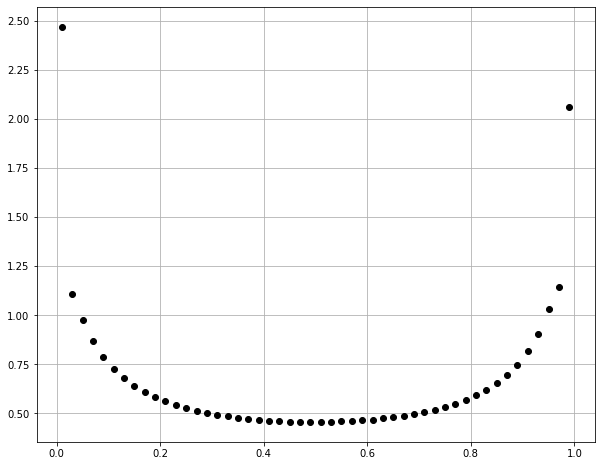

In [3]:
N = 50

h = 1 / N

XM = np.zeros((N, 1))
for i in range(N):
    XM[i] = 0 + (h / 2) + i * h

SN = np.zeros((N + 1, 1))
for j in range(N + 1):
    SN[j] = 0 + j * h 
    
#creating linear system
mat = np.zeros((N, N), dtype = np.complex)
for m in range(N):
    for n in range(N):
        if (n == m):
            mat[m, n] = beta(XM[m], h) * np.sqrt(1 - XM[m] * XM[m]) 
        else:
            mat[m, n] = I(SN[n], SN[n + 1], XM[m])

right = np.full((N, 1), 1, dtype = np.complex)
answer = linalg.solve(mat, right)

plt.rcParams['figure.figsize'] = [10, 8]

res_real = np.real(answer)
plt.plot(XM, res_real, 'bo', color = 'black')
plt.grid()
plt.show()

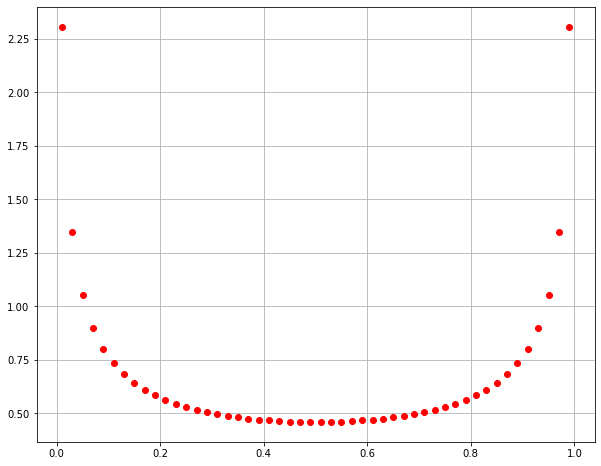

In [4]:
#calculation of exact sln in XM
S = np.zeros((N, 1))
def sln(x):
    return 1 / (2 * np.pi * np.log(2) * np.sqrt(x * (1 - x)))
for i in range(N):
    S[i] = sln(XM[i])
plt.plot(XM, S, 'bo', color = 'red')
plt.grid()
plt.show()

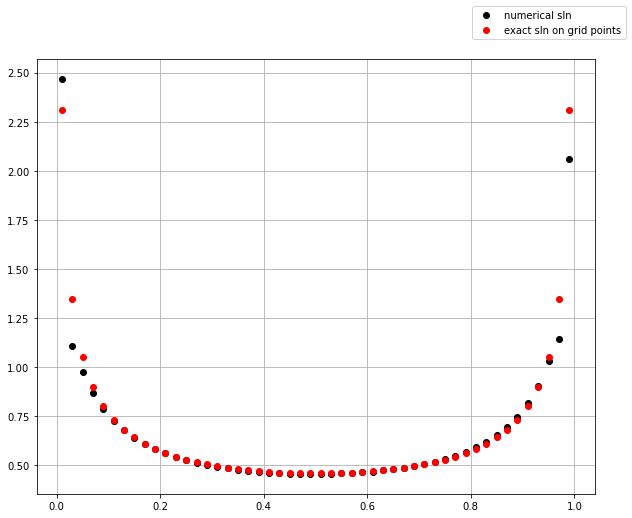

In [5]:
plt.plot(XM, res_real, 'bo', color = 'black', label = "numerical sln")
plt.plot(XM, S, 'bo',color = 'red', label = "exact sln on grid points")
plt.legend(bbox_to_anchor=(0.95, 0.98),
           bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

Abs. error =  [0.24610036]
Abs. error without boundaries =  [0.23593424]


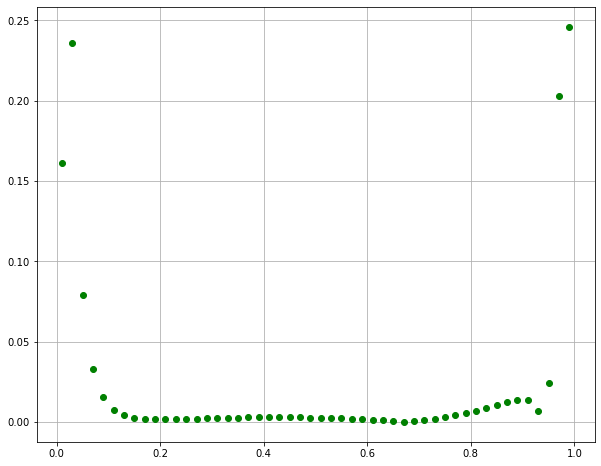

In [6]:
error = np.zeros((N, 1))
for i in range(N):
    error[i] = np.abs(res_real[i] - S[i])
print("Abs. error = ", max(error))
print("Abs. error without boundaries = ", max(error[1 : N - 1]))
plt.plot(XM, error, 'bo', color = 'green')
plt.grid()
plt.show()

[0.51]
max r =  [1.10699679]


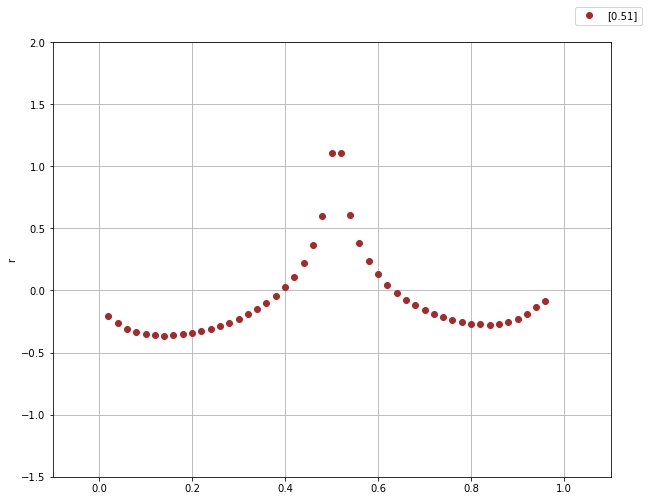

In [7]:
#finding residual in x_m = 0.5 + 0.02/2 = 0.51 - middle point

print(XM[25])

r1 = np.zeros((N, 1))
for n in range(N):
    numSln = res_real[n] * np.log(1 / np.abs(XM[25] - SN[n]))
    r1[n] = numSln - 1

print("max r = ", max(r1[1 : N - 1]))

plt.plot(SN[1 : N - 1], r1[1 : N - 1], 'bo', color = "brown", label = XM[25])

plt.legend(bbox_to_anchor=(0.95, 0.95),
           bbox_transform=plt.gcf().transFigure)

plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 2.0)

plt.ylabel("r")

plt.grid()
plt.show()

[0.21]
max r =  [1.58832762]


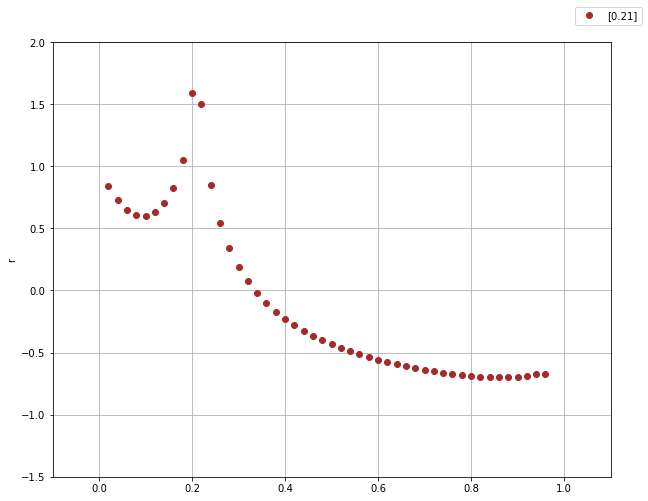

In [8]:
#finding residual in x_m = 0.2 + 0.02/2 = 0.21 

print(XM[10])

r2 = np.zeros((N, 1))
for n in range(N):
    numSln = res_real[n] * np.log(1 / np.abs(XM[10] - SN[n]))
    r2[n] = numSln - 1

print("max r = ", max(r2[1 : N - 1]))

plt.plot(SN[1 : N - 1], r2[1 : N - 1], 'bo', color = "brown", label = XM[10])

plt.legend(bbox_to_anchor=(0.95, 0.95),
           bbox_transform=plt.gcf().transFigure)

plt.xlim(-0.1, 1.1)
plt.ylim(-1.5, 2.0)

plt.ylabel("r")

plt.grid()
plt.show()

[0.01]
max r =  [4.11208621]


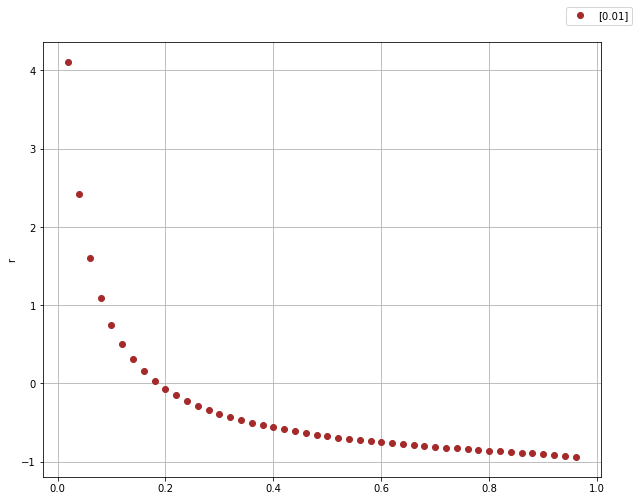

In [9]:
#finding residual in xm = 0.0 + 0.02/2 = 0.01 - boundary point

print(XM[0])

r3 = np.zeros((N, 1))
for n in range(N):
    numSln = res_real[n] * np.log(1 / np.abs(XM[0] - SN[n]))
    r3[n] = numSln - 1

print("max r = ", max(r3[1 : N - 1]))

plt.plot(SN[1 : N - 1], r3[1 : N - 1], 'bo', color = "brown", label = XM[0])

plt.legend(bbox_to_anchor=(0.95, 0.95),
           bbox_transform=plt.gcf().transFigure)

#plt.xlim(-0.1, 1.1)
#plt.ylim(-1.5, 2.0)

plt.ylabel("r")

plt.grid()
plt.show()